#### Imports

In [ ]:
!pip install xgboost

In [26]:
import sys
import os
import time
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from gensim.models import Word2Vec

import xgboost as xgb
from sklearn.base import BaseEstimator, TransformerMixin


#### Preprocessing and Splitting

In [38]:
# read/prep data
dat = pd.read_csv("../data/tokenized_reviews.csv")
dat = dat.dropna()
dat["quote"] = dat["quote"].astype(int)
dat["tokenized_words"] = dat["tokenized_words"].apply(lambda x: x.strip("[']").replace("', '"," "))

In [39]:
# 85% train / 15% test
X_train, X_test, y_train, y_test = train_test_split(dat.drop(columns=["popular"]),
                                                    dat["popular"],
                                                    test_size = 0.15,
                                                    random_state = 229,
                                                    stratify = dat["popular"])

In [40]:
X_train.shape, y_train.shape

((1453600, 13), (1453600,))

#### Down Sampling

In [42]:
# undersample train set
majority_size = len(y_train[y_train==0])
minority_size = len(y_train[y_train==1])
majority_indices = y_train[y_train==0].index
rng = np.random.default_rng(seed=229)
drop_indices = rng.choice(majority_indices, majority_size-minority_size, replace=False)
X_train = X_train.drop(drop_indices)
y_train = y_train.drop(drop_indices)

In [43]:
X_train.shape, y_train.shape

((431298, 13), (431298,))

In [7]:
numerical_cols = [col for col in X_train.columns if col != 'tokenized_words']

#### BOW (Undersampling)

#### TF-IDF

In [16]:
# TF-IDF
print("\n\nXGBOOST - RANDOM FOREST - TF-IDF")

# pipeline
tfidf_pipe = make_pipeline(
    ColumnTransformer(remainder='passthrough',
                      transformers=[('tfidfvectorizer',TfidfVectorizer(),'tokenized_words'),
                                   ('standardscaler', StandardScaler(), numerical_cols) ]),
    xgb.XGBRegressor(objective='binary:logistic',
                     eval_metric='error',
                     seed=229,
                     n_jobs=-1))


# parameters to try
parameters = {
    'xgbregressor__n_estimators': (100,1000),
    'xgbregressor__max_depth': (4,6),
    'xgbregressor__learning_rate': (0.1, 0.3)
}

# perform validation
gs_tfidf_pipe = GridSearchCV(tfidf_pipe,
                           parameters,
                           cv=ShuffleSplit(n_splits=1,
                                           test_size=0.15,
                                           random_state=229), n_jobs=-1,verbose=3)
gs_tfidf_pipe.fit(X_train, y_train)



XGBOOST - RANDOM FOREST - TF-IDF
Fitting 1 folds for each of 8 candidates, totalling 8 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x11001dd00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107511d00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/

[CV 1/1] END xgbregressor__learning_rate=0.3, xgbregressor__max_depth=4, xgbregressor__n_estimators=100;, score=0.249 total time= 5.8min


Exception ignored in: <function ResourceTracker.__del__ at 0x106669d00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=100;, score=0.235 total time= 6.4min


Exception ignored in: <function ResourceTracker.__del__ at 0x10abd1d00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.3, xgbregressor__max_depth=6, xgbregressor__n_estimators=100;, score=0.255 total time=11.5min


Exception ignored in: <function ResourceTracker.__del__ at 0x104fadd00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=6, xgbregressor__n_estimators=100;, score=0.245 total time=13.1min


Exception ignored in: <function ResourceTracker.__del__ at 0x102bb5d00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.3, xgbregressor__max_depth=4, xgbregressor__n_estimators=1000;, score=0.269 total time=18.3min


Exception ignored in: <function ResourceTracker.__del__ at 0x105349d00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=1000;, score=0.264 total time=19.0min


Exception ignored in: <function ResourceTracker.__del__ at 0x106a29d00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.3, xgbregressor__max_depth=6, xgbregressor__n_estimators=1000;, score=0.263 total time=29.5min


Exception ignored in: <function ResourceTracker.__del__ at 0x10651dd00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=6, xgbregressor__n_estimators=1000;, score=0.270 total time=32.3min


Exception ignored in: <function ResourceTracker.__del__ at 0x10505dd00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=229, test_size=0.15, train_size=None),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('tfidfvectorizer',
                                                                         TfidfVectorizer(),
                                                                         'tokenized_words'),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['user_reviews',
                                                                          'days_since_review',
                                                                          'user_rating',
                                                                          'rating_diff',
                                                                          'nu...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=-1,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbregressor__learning_rate': (0.1, 0.3),
                         'xgbregressor__max_depth': (4, 6),
                         'xgbregressor__n_estimators': (100, 1000)},
             verbose=3)

In [17]:
# print save
print(gs_tfidf_pipe.cv_results_)
print(gs_tfidf_pipe.best_params_)

# save the best model with pickle
with open("./xgboost_tfidf_model_cde.pkl", "wb") as f:
    pickle.dump(gs_tfidf_pipe.best_estimator_, f)

print("\nBest model saved as 'xgboost_tfidf_model_cde.pkl'")

{'mean_fit_time': array([ 373.97754383, 1134.23915291,  780.62015629, 1930.76124287,
        339.48315334, 1093.31210279,  680.69858193, 1766.66438985]), 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0.]), 'mean_score_time': array([8.65802813, 5.55718708, 5.32359695, 5.40668583, 8.99425673,
       5.09616423, 7.42966819, 5.02466726]), 'std_score_time': array([0., 0., 0., 0., 0., 0., 0., 0.]), 'param_xgbregressor__learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=1e+20), 'param_xgbregressor__max_depth': masked_array(data=[4, 4, 6, 6, 4, 4, 6, 6],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=999999), 'param_xgbregressor__n_estimators': masked_array(data=[100, 1000, 100, 1000, 100, 1000, 100, 1000],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=999999), 'params': [{'xgbr

In [18]:
sorted_ind = gs_tfidf_pipe.best_estimator_.named_steps['xgbregressor'].feature_importances_.argsort()[::-1]

tfidf_feature_names = gs_tfidf_pipe.best_estimator_.named_steps['columntransformer'].transformers_[0][1].get_feature_names_out()
num_tfidf_features = len(tfidf_feature_names)

passthrough_columns = X_train.drop(columns=['tokenized_words']).columns.tolist()
all_feature_names = list(tfidf_feature_names) + passthrough_columns

# Print the top 10 feature names and their importances
top_50_indices = sorted_ind[:10]
print("Top 10 features:")
print(np.array(all_feature_names)[top_50_indices])

Top 10 features:
['user_reviews' 'num_words' 'ftc' 'katniss' 'fuck' 'maas' 'fucking'
 'cinder' 'thanks' 'quote']


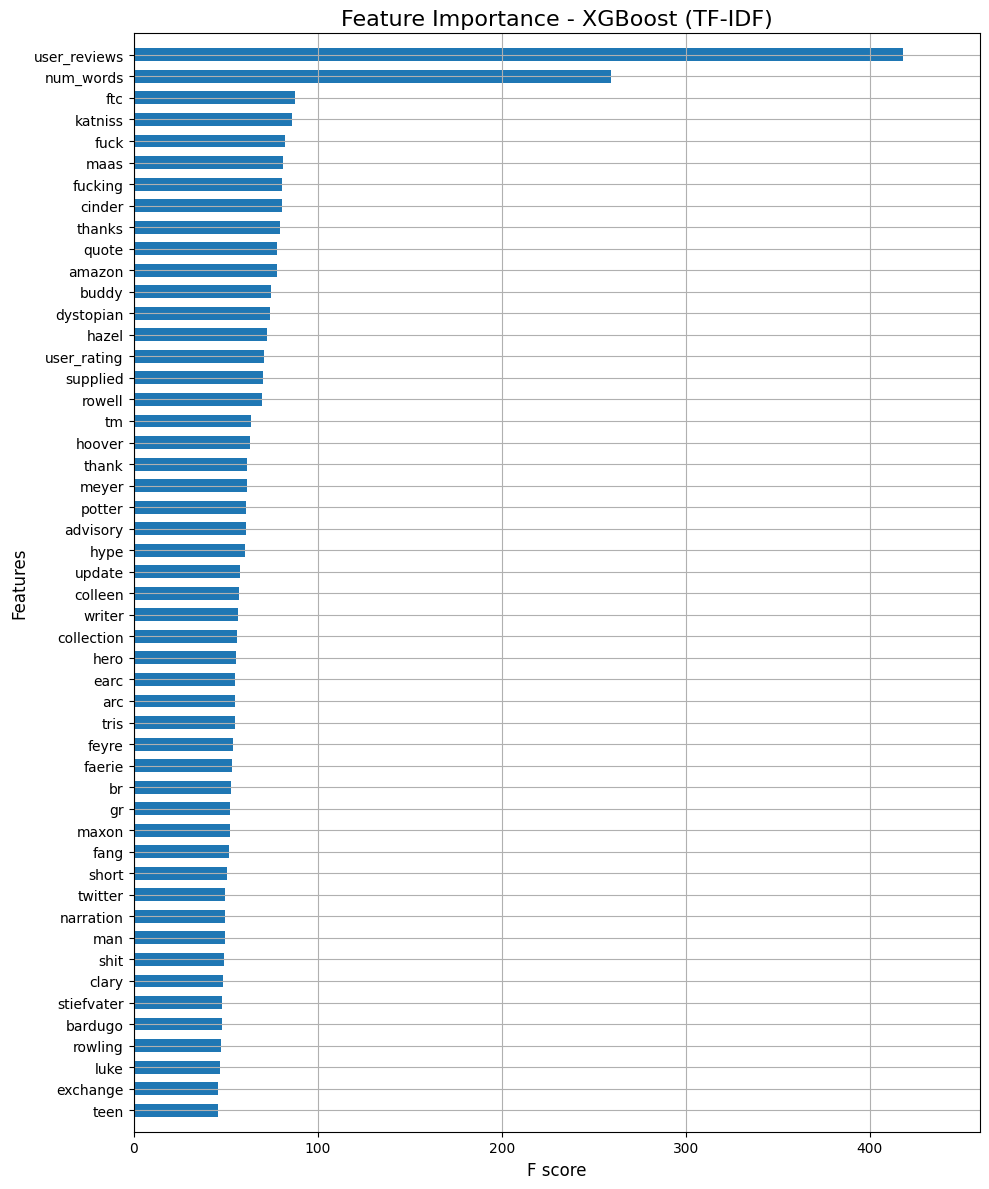

In [19]:
# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 12))
xgb.plot_importance(
    gs_tfidf_pipe.best_estimator_.named_steps['xgbregressor'],
    max_num_features=50,
    ax=ax,
    importance_type='gain',
    show_values=False,
    height=0.6
)

tick_labels = [item.get_text() for item in ax.get_yticklabels()]
for i, label in enumerate(tick_labels):
    try:
        feature_index = int(label[1:])  # label is like 'f123'
        if 0 <= feature_index < len(all_feature_names):
            tick_labels[i] = all_feature_names[feature_index]
    except ValueError:
        pass
ax.set_yticklabels(tick_labels)

plt.title("Feature Importance - XGBoost (TF-IDF)", fontsize=16)
plt.xlabel("F score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.savefig("rf_tfidf.png")
plt.show()

In [21]:
# predict
predictions = gs_tfidf_pipe.predict(X_test)
predictions = list(map(round,predictions))

In [22]:
# evaluate
cm = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Specificity :", tn/(fp+tn))
print("ROC-AUC :", roc_auc_score(y_test, predictions))

[[157290  61172]
 [ 10451  27605]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.81    218462
           1       0.31      0.73      0.44     38056

    accuracy                           0.72    256518
   macro avg       0.62      0.72      0.62    256518
weighted avg       0.84      0.72      0.76    256518

Specificity : 0.7199879155184883
ROC-AUC : 0.722683152629961


### CBoW

In [23]:
# BAG OF WORDS
print("\n\nXGBOOST - RANDOM FOREST - CBoW")

# pipeline
bow_pipe = make_pipeline(
    ColumnTransformer(remainder='passthrough',
                      transformers=[('countvectorizer', CountVectorizer(),'tokenized_words'), 
                                   ('standardscaler', StandardScaler(), numerical_cols)]),
    xgb.XGBRegressor(objective='binary:logistic',
                     eval_metric='error',
                     seed=229,
                     n_jobs=-1))

# parameters to try
parameters = {
    'xgbregressor__n_estimators': (100,1000),
    'xgbregressor__max_depth': (4,6),
    'xgbregressor__learning_rate': (0.1, 0.3)
}

# perform validation
gs_bow_pipe = GridSearchCV(bow_pipe,
                           parameters,
                           cv=ShuffleSplit(n_splits=1,
                                           test_size=0.15,
                                           random_state=229),n_jobs=-1,verbose=3)
gs_bow_pipe.fit(X_train, y_train)



XGBOOST - RANDOM FOREST - CBoW
Fitting 1 folds for each of 8 candidates, totalling 8 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x106b79d00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104a15d00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=229, test_size=0.15, train_size=None),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('countvectorizer',
                                                                         CountVectorizer(),
                                                                         'tokenized_words'),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['user_reviews',
                                                                          'days_since_review',
                                                                          'user_rating',
                                                                          'rating_diff',
                                                                          'nu...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=-1,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbregressor__learning_rate': (0.1, 0.3),
                         'xgbregressor__max_depth': (4, 6),
                         'xgbregressor__n_estimators': (100, 1000)},
             verbose=3)

[CV 1/1] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=100;, score=0.235 total time=  39.7s


Exception ignored in: <function ResourceTracker.__del__ at 0x1054a5d00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.3, xgbregressor__max_depth=4, xgbregressor__n_estimators=100;, score=0.248 total time=  38.6s


Exception ignored in: <function ResourceTracker.__del__ at 0x1048ddd00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.3, xgbregressor__max_depth=6, xgbregressor__n_estimators=100;, score=0.255 total time=  54.7s


Exception ignored in: <function ResourceTracker.__del__ at 0x1049c9d00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=6, xgbregressor__n_estimators=100;, score=0.244 total time= 1.0min


Exception ignored in: <function ResourceTracker.__del__ at 0x102a29d00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.3, xgbregressor__max_depth=4, xgbregressor__n_estimators=1000;, score=0.271 total time= 2.2min


Exception ignored in: <function ResourceTracker.__del__ at 0x102e1dd00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=1000;, score=0.265 total time= 2.3min


Exception ignored in: <function ResourceTracker.__del__ at 0x11081dd00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.3, xgbregressor__max_depth=6, xgbregressor__n_estimators=1000;, score=0.271 total time= 3.8min


Exception ignored in: <function ResourceTracker.__del__ at 0x106d99d00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=6, xgbregressor__n_estimators=1000;, score=0.272 total time= 4.1min


Exception ignored in: <function ResourceTracker.__del__ at 0x106de1d00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


In [24]:
# print model
print(gs_bow_pipe.cv_results_)
print(gs_bow_pipe.best_params_)

# save the best model with pickle
with open("./xgboost_bow_model_cde.pkl", "wb") as f:
    pickle.dump(gs_bow_pipe.best_estimator_, f)

print("\nBest model saved as 'xgboost_bow_model_cde.pkl'")

{'mean_fit_time': array([ 35.84392333, 133.30427289,  56.49859381, 243.32555199,
        34.75194192, 127.90338588,  51.00735378, 224.20040798]), 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0.]), 'mean_score_time': array([3.87634468, 4.35574102, 3.73140812, 4.63173294, 3.82987905,
       4.27692604, 3.72735119, 4.52409983]), 'std_score_time': array([0., 0., 0., 0., 0., 0., 0., 0.]), 'param_xgbregressor__learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=1e+20), 'param_xgbregressor__max_depth': masked_array(data=[4, 4, 6, 6, 4, 4, 6, 6],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=999999), 'param_xgbregressor__n_estimators': masked_array(data=[100, 1000, 100, 1000, 100, 1000, 100, 1000],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=999999), 'params': [{'xgbregressor

In [28]:
# feature importance
sorted_ind = gs_bow_pipe.best_estimator_.named_steps['xgbregressor'].feature_importances_.argsort()[::-1]
feature_names = gs_bow_pipe.best_estimator_.named_steps['columntransformer'].transformers_[0][1].get_feature_names_out()
num_bow_features = len(feature_names)
bow_indices = sorted_ind[sorted_ind < num_bow_features]
top_bow_features = np.take(feature_names, bow_indices[:10])

# Print the top 10 CountVectorizer features
print(top_bow_features)
# print(np.take(gs_bow_pipe.best_estimator_.named_steps['xgbregressor'].feature_importances_, bow_indices[:50]))

['katniss' 'ftc' 'maas' 'cinder' 'fuck' 'amazon' 'thank' 'thanks' 'hype'
 'fucking']


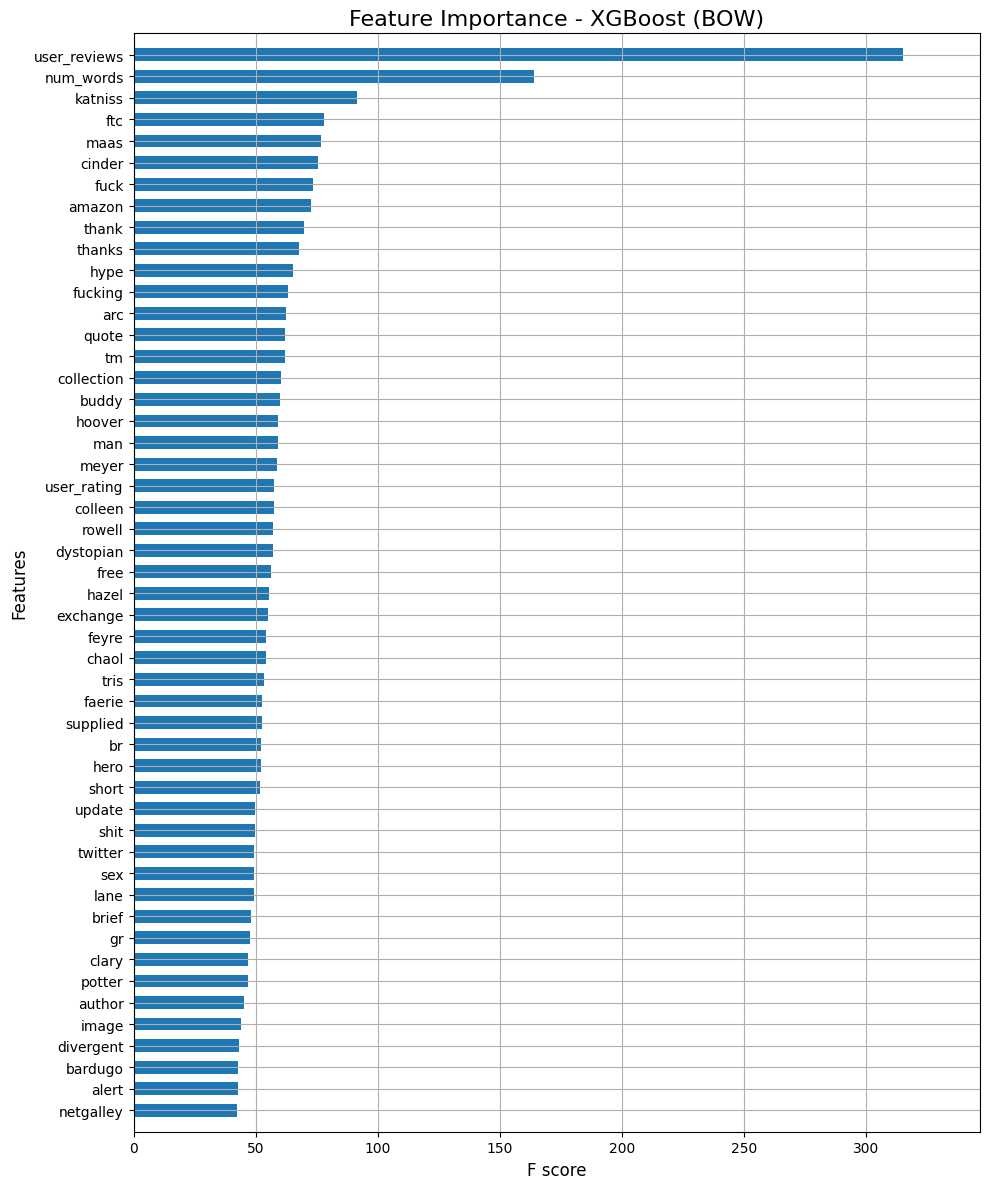

In [29]:
# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 12))
xgb.plot_importance(
    gs_bow_pipe.best_estimator_.named_steps['xgbregressor'],
    max_num_features=50,
    ax=ax,
    importance_type='gain',
    show_values=False,
    height=0.6  )

tick_labels = [item.get_text() for item in ax.get_yticklabels()]

passthrough_columns = X_train.drop(columns=['tokenized_words']).columns.tolist()

for i in range(len(tick_labels)):
    try:
        feature_index = int(tick_labels[i][1:])

        if feature_index < num_bow_features:
            tick_labels[i] = feature_names[feature_index]
        else:
            passthrough_index = feature_index - num_bow_features

            if 0 <= passthrough_index < len(passthrough_columns):
                tick_labels[i] = passthrough_columns[passthrough_index]

    except ValueError:
        pass

# Set updated tick labels
ax.set_yticklabels(tick_labels)

plt.title("Feature Importance - XGBoost (BOW)", fontsize=16)
plt.xlabel("F score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig("rf_bow.png")
plt.show()

In [26]:
# predict
predictions = gs_bow_pipe.predict(X_test)
predictions = list(map(round,predictions))

In [27]:
# evaluate
cm = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Specificity :", tn/(fp+tn))
print("ROC-AUC :", roc_auc_score(y_test, predictions))

[[157888  60574]
 [ 10448  27608]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.82    218462
           1       0.31      0.73      0.44     38056

    accuracy                           0.72    256518
   macro avg       0.63      0.72      0.63    256518
weighted avg       0.85      0.72      0.76    256518

Specificity : 0.7227252336790838
ROC-AUC : 0.7240912273083246


### Word2Vec

In [30]:
print(f"NumPy: {numpy.__version__}\nGensim: {gensim.__version__}")

NumPy: 1.26.4
Gensim: 4.3.3


In [11]:
# Custom transformer for Word2Vec averaging
class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, vector_size=100, window=5, min_count=1, workers=1, seed=229):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.workers = workers
        self.seed = seed
        self.model = None

    def fit(self, X, y=None):
        # Handle different input types
        if isinstance(X, np.ndarray):
            sentences = [doc.split() for doc in X.ravel()]
        elif isinstance(X, pd.DataFrame):
            sentences = [doc.split() for doc in X.iloc[:, 0]]
        else:
            sentences = [doc.split() for doc in X]

        self.model = Word2Vec(sentences, vector_size=self.vector_size, window=self.window,
                              min_count=self.min_count, workers=self.workers, seed=self.seed)
        return self

    def transform(self, X):
        # Handle different input types
        if isinstance(X, np.ndarray):
            documents = pd.Series(X.ravel())
        elif isinstance(X, pd.DataFrame):
            documents = X.iloc[:, 0]
        else:
            documents = X

        def document_vector(doc):
            words = [word for word in doc.split() if word in self.model.wv]
            if not words:
                return np.zeros(self.vector_size)
            return np.mean(self.model.wv[words], axis=0)

        return np.vstack(documents.apply(document_vector))

In [12]:
# Pipeline
w2v_pipe = make_pipeline(
    ColumnTransformer( transformers=[
            ('word2vec', Word2VecVectorizer(vector_size=100, window=5, min_count=2, workers=4, seed=229), 'tokenized_words'),
            ('standardscaler', StandardScaler(), numerical_cols) 
        ], remainder = 'passthrough'
    ),
    StandardScaler(),
    xgb.XGBRegressor(
        objective='binary:logistic',
        eval_metric='error',
        seed=229,
        n_jobs=-1
    )
)

# Hyperparameter grid
parameters = {
    'xgbregressor__n_estimators': (100, 300),
    'xgbregressor__max_depth': (4, 6),
    'xgbregressor__learning_rate': (0.1, 0.3)
}

# Grid search with ShuffleSplit
gs_w2v_pipe = GridSearchCV(
    w2v_pipe,
    parameters,
    cv=ShuffleSplit(n_splits=1, test_size=0.13, random_state=229),n_jobs=-1,
    verbose=3
)
gs_w2v_pipe.fit(X_train, y_train)

Fitting 1 folds for each of 8 candidates, totalling 8 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x110c19d00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10741dd00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/

[CV 1/1] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=6, xgbregressor__n_estimators=100;, score=nan total time=   2.9s


Exception ignored in: <function ResourceTracker.__del__ at 0x10a11dd00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=100;, score=nan total time=   3.0s
[CV 1/1] END xgbregressor__learning_rate=0.3, xgbregressor__max_depth=4, xgbregressor__n_estimators=300;, score=nan total time=   3.0s
[CV 1/1] END xgbregressor__learning_rate=0.3, xgbregressor__max_depth=4, xgbregressor__n_estimators=100;, score=0.244 total time= 7.6min


Exception ignored in: <function ResourceTracker.__del__ at 0x107bcdd00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=300;, score=nan total time=   3.0s
[CV 1/1] END xgbregressor__learning_rate=0.3, xgbregressor__max_depth=6, xgbregressor__n_estimators=100;, score=nan total time=   2.8s
[CV 1/1] END xgbregressor__learning_rate=0.3, xgbregressor__max_depth=6, xgbregressor__n_estimators=100;, score=0.246 total time= 7.6min


Exception ignored in: <function ResourceTracker.__del__ at 0x10661dd00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.3, xgbregressor__max_depth=6, xgbregressor__n_estimators=300;, score=nan total time=   2.4s
[CV 1/1] END xgbregressor__learning_rate=0.3, xgbregressor__max_depth=6, xgbregressor__n_estimators=300;, score=0.239 total time= 7.8min


Exception ignored in: <function ResourceTracker.__del__ at 0x106e19d00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=229, test_size=0.13, train_size=None),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('word2vec',
                                                                         Word2VecVectorizer(min_count=2,
                                                                                            workers=4),
                                                                         'tokenized_words'),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['user_reviews',
                                                                          'days_since_review',
                                                                          'user_rating',...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=-1,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbregressor__learning_rate': (0.1, 0.3),
                         'xgbregressor__max_depth': (4, 6),
                         'xgbregressor__n_estimators': (100, 300)},
             verbose=3)

[CV 1/1] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300;, score=nan total time=   3.0s
[CV 1/1] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=100;, score=0.237 total time= 7.5min


Exception ignored in: <function ResourceTracker.__del__ at 0x10381dd00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=6, xgbregressor__n_estimators=100;, score=0.247 total time= 7.6min


Exception ignored in: <function ResourceTracker.__del__ at 0x113a1dd00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=4, xgbregressor__n_estimators=300;, score=0.248 total time= 7.7min


Exception ignored in: <function ResourceTracker.__del__ at 0x104bb5d00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.3, xgbregressor__max_depth=4, xgbregressor__n_estimators=100;, score=nan total time=   3.1s
[CV 1/1] END xgbregressor__learning_rate=0.3, xgbregressor__max_depth=4, xgbregressor__n_estimators=300;, score=0.250 total time= 7.9min


Exception ignored in: <function ResourceTracker.__del__ at 0x104b1dd00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV 1/1] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=6, xgbregressor__n_estimators=300;, score=0.254 total time= 8.0min


Exception ignored in: <function ResourceTracker.__del__ at 0x11121dd00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


In [13]:
# print model

print(gs_w2v_pipe.cv_results_)
print(gs_w2v_pipe.best_params_)

# save the best model with pickle
with open("./xgboost_w2v_model_cde.pkl", "wb") as f:
    pickle.dump(gs_w2v_pipe.best_estimator_, f)

print("\nBest model saved as 'xgboost_w2v_model_cde.pkl'")

{'mean_fit_time': array([441.87663484, 455.40721107, 447.57951093, 471.7952199 ,
       448.33307099, 467.57619596, 449.62286305, 463.6331563 ]), 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0.]), 'mean_score_time': array([9.59704709, 7.55060983, 8.60207415, 7.04219079, 7.92727518,
       6.97115397, 7.50284195, 6.41956973]), 'std_score_time': array([0., 0., 0., 0., 0., 0., 0., 0.]), 'param_xgbregressor__learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=1e+20), 'param_xgbregressor__max_depth': masked_array(data=[4, 4, 6, 6, 4, 4, 6, 6],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=999999), 'param_xgbregressor__n_estimators': masked_array(data=[100, 300, 100, 300, 100, 300, 100, 300],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=999999), 'params': [{'xgbregressor__le

In [15]:
# Feature Importance
sorted_ind = gs_w2v_pipe.best_estimator_.named_steps['xgbregressor'].feature_importances_.argsort()[::-1]
num_features = len(sorted_ind)
print(f"Number of features (Word2Vec vector size): {num_features}")

Number of features (Word2Vec vector size): 112


In [16]:
# The top 10 most important embeddings
top_10_indices = sorted_ind[:10]
print("Top 10 embedding dimensions:", top_10_indices)
print("Top 10 importances:", gs_w2v_pipe.best_estimator_.named_steps['xgbregressor'].feature_importances_[top_10_indices])

Top 10 embedding dimensions: [100 104  98 102 101 110  27   0  58  94]
Top 10 importances: [0.14409606 0.09460725 0.03902172 0.02292424 0.01697556 0.01688075
 0.01594122 0.01586273 0.01484742 0.01436567]


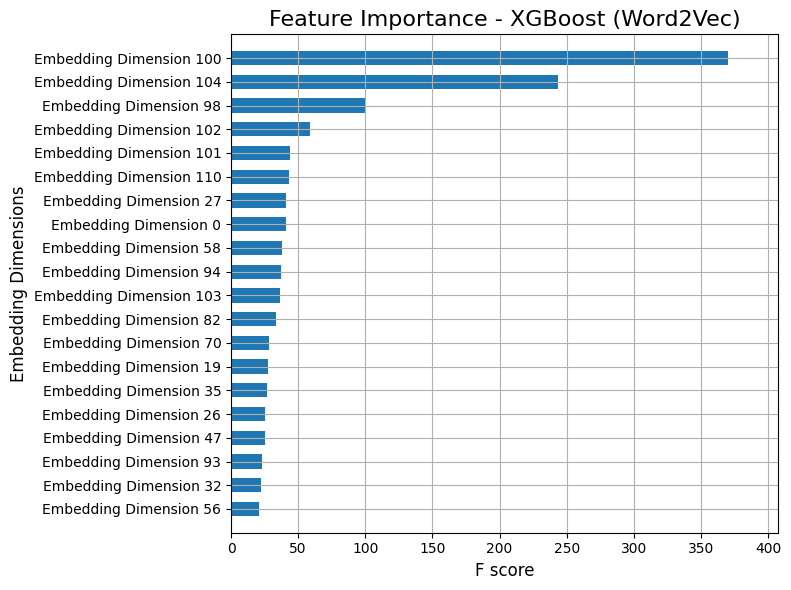

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
xgb.plot_importance(
    gs_w2v_pipe.best_estimator_.named_steps['xgbregressor'],
    max_num_features=20,
    ax=ax,
    importance_type='gain',
    show_values=False,
    height=0.6
)

# Get the current tick labels (e.g., 'f1', 'f2', etc.)
tick_labels = [item.get_text() for item in ax.get_yticklabels()]

# Replace tick labels with more descriptive labels
for i, label in enumerate(tick_labels):
    try:
        feature_index = int(label[1:])  # Extract the feature index (e.g., 1 from 'f1')
        tick_labels[i] = f"Embedding Dimension {feature_index}"  # Create new label
    except ValueError:
        pass  # Handle cases where label is not in the expected format

# Set the updated tick labels on the y-axis
ax.set_yticklabels(tick_labels)

plt.title("Feature Importance - XGBoost (Word2Vec)", fontsize=16)
plt.xlabel("F score", fontsize=12)
plt.ylabel("Embedding Dimensions", fontsize=12)
plt.tight_layout()
plt.savefig("xgb_word2vec.png")
plt.show()

In [18]:
# Predict
predictions = gs_w2v_pipe.predict(X_test)
predictions = list(map(round, predictions))

In [19]:
# evaluate
cm = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Specificity :", tn/(fp+tn))
print("ROC-AUC :", roc_auc_score(y_test, predictions))

[[154779  63683]
 [ 10623  27433]]
              precision    recall  f1-score   support

           0       0.94      0.71      0.81    218462
           1       0.30      0.72      0.42     38056

    accuracy                           0.71    256518
   macro avg       0.62      0.71      0.62    256518
weighted avg       0.84      0.71      0.75    256518

Specificity : 0.7084939257170584
ROC-AUC : 0.7146763301067949


#### CBoW - All Sample

In [21]:
# read/prep data
data = pd.read_csv("../data/tokenized_reviews.csv")
data = data.dropna()
data["quote"] = data["quote"].astype(int)
data["tokenized_words"] = data["tokenized_words"].apply(lambda x: x.strip("[']").replace("', '"," "))

In [22]:
# 85% train / 15% test
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=["popular"]),
                                                    data["popular"],
                                                    test_size = 0.15,
                                                    stratify=data["popular"],
                                                    random_state = 229)

X_train.shape, y_train.shape

((1453600, 13), (1453600,))

In [27]:
# BAG OF WORDS
print("\n\nXGBOOST - RANDOM FOREST - CBoW")

start_time = time.time()

# pipeline
preprocessor = make_pipeline(
    ColumnTransformer(remainder='passthrough',
                      transformers=[('countvectorizer',
                                     CountVectorizer(),'tokenized_words'), 
                                    ('standardscaler', StandardScaler(), numerical_cols) ]),
    xgb.XGBRegressor(objective='binary:logistic',
                     eval_metric='error',
                     seed=229,
                     n_jobs=-1))

# parameters to try
parameters = {
    'xgbregressor__n_estimators': (100,1000),
    'xgbregressor__max_depth': (4,6),
    'xgbregressor__learning_rate': (0.1, 0.3)
}

# perform validation
gs_bow_pipe = GridSearchCV(preprocessor,
                           parameters,
                           cv=ShuffleSplit(n_splits=1,
                                           test_size=0.15,
                                           random_state=229),n_jobs=-1)
gs_bow_pipe.fit(X_train, y_train)

total_time = time.time() - start_time
print(f"\nTraining completed in: {total_time:.2f} seconds\n\n")



XGBOOST - RANDOM FOREST - CBoW


Exception ignored in: <function ResourceTracker.__del__ at 0x107e1dd00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x105485d00>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/opt/homebrew/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/


Training completed in: 667.31 seconds




In [28]:
# save the model
print(gs_bow_pipe.cv_results_)
print(gs_bow_pipe.best_params_)

# save the best model with pickle
with open("./xgboost_bow_model_f.pkl", "wb") as f:
    pickle.dump(gs_bow_pipe.best_estimator_, f)
 
print("\nBest model saved as 'xgboost_bow_model_f.pkl'")

{'mean_fit_time': array([107.47034478, 310.93231511, 156.06877899, 493.23196697,
       115.25457311, 302.99355412, 147.07984376, 459.94970322]), 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0.]), 'mean_score_time': array([17.1478672 , 15.10751987, 16.17884994, 15.67097807, 17.66402793,
       14.57961392, 15.65037107, 14.84892988]), 'std_score_time': array([0., 0., 0., 0., 0., 0., 0., 0.]), 'param_xgbregressor__learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=1e+20), 'param_xgbregressor__max_depth': masked_array(data=[4, 4, 6, 6, 4, 4, 6, 6],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=999999), 'param_xgbregressor__n_estimators': masked_array(data=[100, 1000, 100, 1000, 100, 1000, 100, 1000],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=999999), 'params': [{'xgbr

In [29]:
# feature importance
sorted_ind = gs_bow_pipe.best_estimator_.named_steps['xgbregressor'].feature_importances_.argsort()[::-1]
feature_names = gs_bow_pipe.best_estimator_.named_steps['columntransformer'].transformers_[0][1].get_feature_names_out()
num_bow_features = len(feature_names)
bow_indices = sorted_ind[sorted_ind < num_bow_features]
top_bow_features = np.take(feature_names, bow_indices[:10])

print(top_bow_features)


['ftc' 'supplied' 'youtube' 'br' 'divergent' 'katniss' 'tm' 'hype' 'fuck'
 'policy']


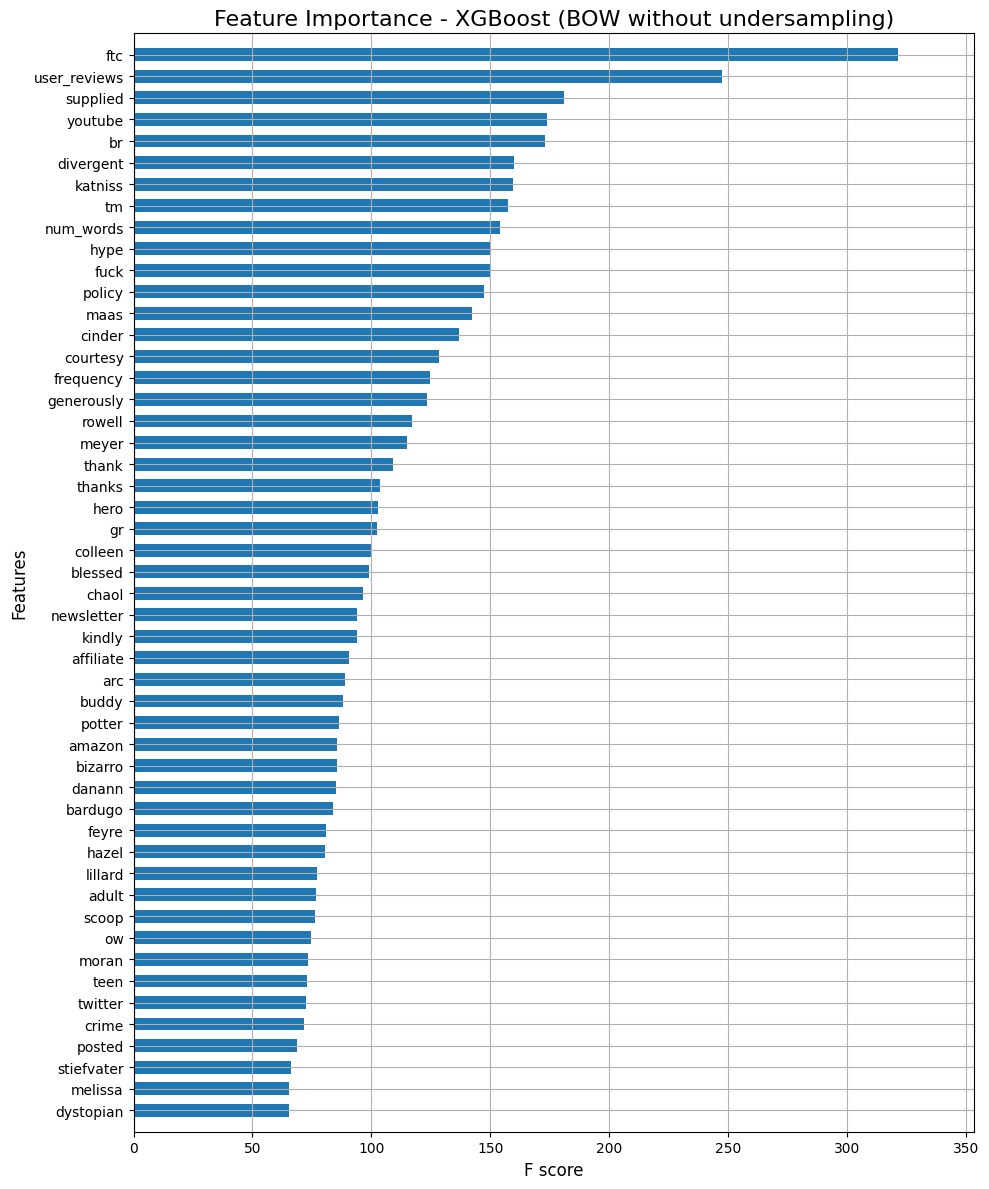

In [30]:
# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 12))
xgb.plot_importance(
    gs_bow_pipe.best_estimator_.named_steps['xgbregressor'],
    max_num_features=50,
    ax=ax,
    importance_type='gain',
    show_values=False,
    height=0.6  )

tick_labels = [item.get_text() for item in ax.get_yticklabels()]

passthrough_columns = X_train.drop(columns=['tokenized_words']).columns.tolist()

for i in range(len(tick_labels)):
    try:
        feature_index = int(tick_labels[i][1:])

        if feature_index < num_bow_features:
            tick_labels[i] = feature_names[feature_index]
        else:
            passthrough_index = feature_index - num_bow_features

            if 0 <= passthrough_index < len(passthrough_columns):
                tick_labels[i] = passthrough_columns[passthrough_index]

    except ValueError:
        pass

# Set updated tick labels
ax.set_yticklabels(tick_labels)

plt.title("Feature Importance - XGBoost (BOW without undersampling)", fontsize=16)
plt.xlabel("F score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig("rf_bow.png")
plt.show()

In [31]:
# predict
predictions = gs_bow_pipe.predict(X_test)
predictions = list(map(round,predictions))

In [33]:
# evaluate
cm = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Specificity :", tn/(fp+tn))
print("ROC-AUC :", roc_auc_score(y_test, predictions))

[[214392   4070]
 [ 29520   8536]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93    218462
           1       0.68      0.22      0.34     38056

    accuracy                           0.87    256518
   macro avg       0.78      0.60      0.63    256518
weighted avg       0.85      0.87      0.84    256518

Specificity : 0.981369757669526
ROC-AUC : 0.6028353938652443


In [44]:
y_train.value_counts()

popular
1    215649
0    215649
Name: count, dtype: int64